### Ishaan Mehta E18CSE069 EB02 LabWeek3 Part1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Read the data from local cloud directory
data = pd.read_csv('./challenge-week-3-master/data/divorce.csv', sep=';')
# Set delimiter to semicolon(;) in case of unexpected results

In [5]:
# Add column which has all 1s
# The idea is that weight corresponding to this column is equal to intercept
# This way it is efficient and easier to handle the bias/intercept term
data.insert(0, "Atr0", [1]*len(data), allow_duplicates=True)

In [6]:
# Print the dataframe rows just to see some samples
data.head(10)

,Atr0,Atr0,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,1,1,2,2,4,1,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,1,1,4,4,4,4,4,0,0,4,...,2,2,3,4,4,4,4,2,2,1
2,1,1,2,2,2,2,1,3,2,1,...,3,2,3,1,1,1,2,2,2,1
3,1,1,3,2,3,2,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,1,1,2,2,1,1,1,1,0,0,...,2,1,2,3,2,2,2,1,0,1
5,1,1,0,0,1,0,0,2,0,0,...,2,2,1,2,1,1,1,2,0,1
6,1,1,3,3,3,2,1,3,4,3,...,3,2,3,2,3,3,2,2,2,1
7,1,1,2,1,2,2,2,1,0,3,...,0,1,2,2,2,1,1,1,0,1
8,1,1,2,2,1,0,0,4,1,3,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,2,0,2,...,2,0,2,2,2,2,4,3,3,1


In [8]:
# Define X (input features) and y (output feature) 
X = data.iloc[:,0:55].values
y = np.array(data.Class)

In [9]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(170, 55)
y: Type-<class 'numpy.ndarray'>, Shape-(170,)


In [10]:
# Check and fill any missing values if any
for v in data.isnull().sum():
    if v != 0:
        print('Null present')

In [11]:
# Perform standarization (if required)
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
standardized_features = scalar.fit_transform(X[:, 1:55].copy())
dropped = np.delete(X, [i for i in range(1,55)], axis=1)
X = np.concatenate((dropped, standardized_features), axis = 1)

In [12]:
# Split the dataset into training and testing here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [13]:
# Print the shape of features and target of training and testing: X_train, X_test, y_train, y_test
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")
assert (X_train.shape[0]==y_train.shape[0] and X_test.shape[0]==y_test.shape[0]), "Check your splitting carefully"

X_train: (144, 55) , y_train: (144,)
X_test: (26, 55) , y_test: (26,)


In [14]:
# DO NOT EDIT ANY VARIABLE OR FUNCTION NAME(S) IN THIS CELL
# Let's try more object oriented approach this time :)
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        '''Initialize variables
        Args:
            learning_rate  : Learning Rate
            max_iterations : Max iterations for training weights
        '''
        # Initialising all the parameters
        self.learning_rate  = learning_rate
        self.max_iterations = max_iterations
        self.likelihoods    = []
        
        # Define epsilon because log(0) is not defined
        self.eps = 1e-7

    def sigmoid(self, z):
        '''Sigmoid function: f:R->(0,1)
        Args:
            z : A numpy array (num_samples,)
        Returns:
            A numpy array where sigmoid function applied to every element
        '''
        ### START CODE HERE
        sig_z = 1 / (1 + np.exp(-z))
        ### END CODE HERE
        
        assert (z.shape==sig_z.shape), 'Error in sigmoid implementation. Check carefully'
        return sig_z
    
    def log_likelihood(self, y_true, y_pred):
        '''Calculates maximum likelihood estimate
        Remember: y * log(yh) + (1-y) * log(1-yh)
        Note: Likelihood is defined for multiple classes as well, but for this dataset
        we only need to worry about binary/bernoulli likelihood function
        Args:
            y_true : Numpy array of actual truth values (num_samples,)
            y_pred : Numpy array of predicted values (num_samples,)
        Returns:
            Log-likelihood, scalar value
        '''
        # Fix 0/1 values in y_pred so that log is not undefined
        y_pred = np.maximum(np.full(y_pred.shape, self.eps), np.minimum(np.full(y_pred.shape, 1-self.eps), y_pred))
        
        ### START CODE HERE
        likelihood =  np.sum(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
        ### END CODE HERE
        
        return likelihood
    
    def fit(self, X, y):
        '''Trains logistic regression model using gradient ascent
        to gain maximum likelihood on the training data
        Args:
            X : Numpy array (num_examples, num_features)
            y : Numpy array (num_examples, )
        Returns: VOID
        '''
        
        num_examples = X.shape[0]
        num_features = X.shape[1]
        
        ### START CODE HERE
        
        # Initialize weights with appropriate shape
        self.weights = np.zeros(num_features)
        
        # Perform gradient ascent
        for i in range(self.max_iterations):
            # Define the linear hypothesis(z) first
            # HINT: what is our hypothesis function in linear regression, remember?
            z = X@self.weights
            
            # Output probability value by appplying sigmoid on z
            y_pred = self.sigmoid(z)
            
            # Calculate the gradient values
            # This is just vectorized efficient way of implementing gradient. Don't worry, we will discuss it later.
            gradient = np.mean((y-y_pred)*X.T, axis=1)
            
            # Update the weights
            # Caution: It is gradient ASCENT not descent
            self.weights = self.weights + gradient
            
            # Calculating log likelihood
            likelihood = self.log_likelihood(y, y_pred)

            self.likelihoods.append(likelihood)
    
        ### END CODE HERE
    
    def predict_proba(self, X):
        '''Predict probabilities for given X.
        Remember sigmoid returns value between 0 and 1.
        Args:
            X : Numpy array (num_samples, num_features)
        Returns:
            probabilities: Numpy array (num_samples,)
        '''
        if self.weights is None:
            raise Exception("Fit the model before prediction")
        
        ### START CODE HERE
        z = X@self.weights
        probabilities = self.sigmoid(z)
        ### END CODE HERE
        
        return probabilities
    
    def predict(self, X, threshold=0.5):
        '''Predict/Classify X in classes
        Args:
            X         : Numpy array (num_samples, num_features)
            threshold : scalar value above which prediction is 1 else 0
        Returns:
            binary_predictions : Numpy array (num_samples,)
        '''
        # Thresholding probability to predict binary values
        binary_predictions = np.array(pd.DataFrame(self.predict_proba(X)).applymap(lambda x: 1 if x>threshold else 0))
        
        return binary_predictions

In [15]:
# Now initialize logitic regression implemented by you
model = MyLogisticRegression()

In [18]:
# And now fit on training data
model.fit(X_train, y_train)

In [19]:
# Train log-likelihood
train_log_likelihood = model.log_likelihood(y_train, model.predict_proba(X_train))
print("Log-likelihood on training data:", train_log_likelihood)

Log-likelihood on training data: -0.9930243929565952


In [20]:
# Test log-likelihood
test_log_likelihood = model.log_likelihood(y_test, model.predict_proba(X_test))
print("Log-likelihood on testing data:", test_log_likelihood)

Log-likelihood on testing data: -2.8823716485784345


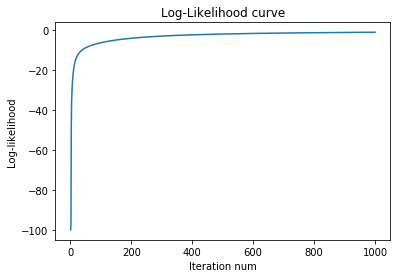

In [21]:

# Plot the loss curve
plt.plot([i+1 for i in range(len(model.likelihoods))], model.likelihoods)
plt.title("Log-Likelihood curve")
plt.xlabel("Iteration num")
plt.ylabel("Log-likelihood")
plt.show()


In [22]:
#Make predictions on test data
y_pred = model.predict(X_test)

In [23]:
def accuracy(y_true,y_pred):
    '''Compute accuracy.
    Accuracy = (Correct prediction / number of samples)
    Args:
        y_true : Truth binary values (num_examples, )
        y_pred : Predicted binary values (num_examples, )
    Returns:
        accuracy: scalar value
    '''
    
    ### START CODE HERE
    n_sample = y_true.shape[0]
    c_pred = 0
    for i in range(n_sample):
        if y_true[i] == y_pred[i]:
            c_pred+=1
    accuracy = c_pred/n_sample
    ### END CODE HERE
    return accuracy*100

In [24]:
# Print accuracy on train data
print('{:.2f}%'.format(accuracy(y_train, (model.predict(X_train)))))

100.00%


In [25]:
# Print accuracy on test data
print('{:.2f}%'.format(accuracy(y_test, y_pred)))

96.15%


### Part1.2

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
# Define X and y
X = X
y = y

In [28]:
# Initialize the model from sklearn
model = LogisticRegression(max_iter=1000)

In [29]:
# Fit the model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# Predict on testing set X_test
y_pred = model.predict(X_test)

In [31]:
# Print Accuracy on testing set
test_accuracy_sklearn = accuracy_score(y_test, y_pred)

print(f"\nAccuracy on testing set: {test_accuracy_sklearn}")


Accuracy on testing set: 0.9615384615384616
